In [1]:
#Import of the main libraries for DataViz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as stats
print("Setup Complete")

Setup Complete




---



# **Quick Analysis for Covid Evolution in France**


### Goal
The main goal is to visualize the covid 19 pandemic in france using jupyter Notebook.




---



### Sources
I used french gouverment open data website [here](https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/).
The data is for the whole France.



In [2]:
# definition of the file path
file_path_indicateurs = '/table-indicateurs-open-data-france.csv'

#I put the data into a pandas dataframe
data_indicateurs = pd.read_csv(file_path_indicateurs)
data_indicateurs['extract_date'] = pd.to_datetime(data_indicateurs['extract_date'])
data_indicateurs.set_index('extract_date',inplace=True)
#I read the head of the dataframe to have an understanding of data structure
data_indicateurs.head()

,tx_incid,R,taux_occupation_sae,tx_pos
extract_date,,,,
2020-03-18,NaN,NaN,15.2,NaN
2020-03-19,5.570823,NaN,19.8,NaN
2020-03-20,8.403950,NaN,25.6,NaN
2020-03-21,11.013409,NaN,28.7,NaN
2020-03-22,13.600502,NaN,33.1,NaN




---



## Quick graph of the data in function of time


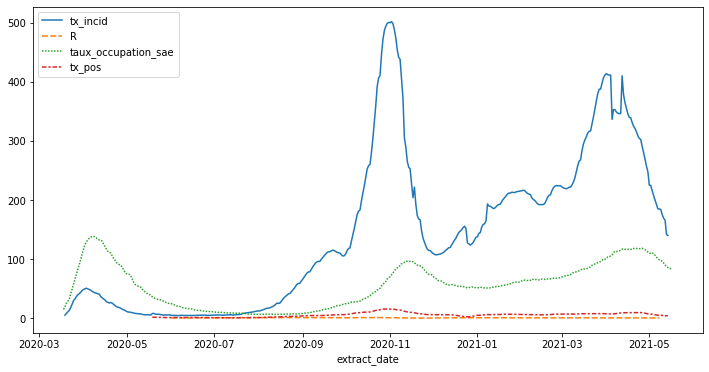

In [3]:
#Plotting data in function of time
ax1 = plt.figure(figsize=(12,6))
ax1 = sns.lineplot(data=data_indicateurs)

Clearly the main phases of the epidemic can be seen with the incidence rate evolution trough time.



---



## Looking for relation between variables
we delete missing values to make better correlatins between variables.
Then we can ask ourselves what are the relation among outputs.

In [4]:
#Deleting missing values
data_indicateurs2 = data_indicateurs.dropna()
data_indicateurs2.reset_index(inplace=True)
data_indicateurs2.head()

,extract_date,tx_incid,R,taux_occupation_sae,tx_pos
0,2020-06-01,5.197050,0.84,25.1,1.501300
1,2020-06-02,5.147881,0.84,24.1,1.520426
2,2020-06-03,5.067422,0.83,23.3,1.507729
3,2020-06-04,5.048052,0.84,22.4,1.522279
4,2020-06-05,5.000373,0.85,21.1,1.526863


### Use of Linear Regression
I use linear regression to any sort of correlation between the variables.


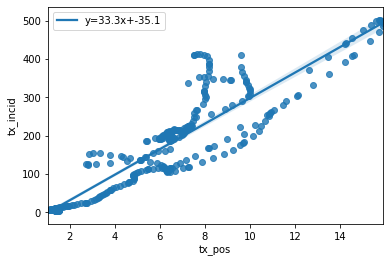

In [5]:
#Linear regression between tx_pos and tx_incid with equation of the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data_indicateurs2['tx_pos'],data_indicateurs2['tx_incid'])

ax2 = sns.regplot(x="tx_pos", y="tx_incid", data=data_indicateurs2, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax2.legend()

Here we can see a strong relation between the incidence rate and the positivity rate.



---



## Correlation between variables

In [6]:
#Creating a dataframe with only the numerics values
dataframe = pd.DataFrame(data_indicateurs2, columns=['tx_incid', 'taux_occupation_sae', 'tx_pos'])
dataframe.head()

,tx_incid,taux_occupation_sae,tx_pos
0,5.197050,25.1,1.501300
1,5.147881,24.1,1.520426
2,5.067422,23.3,1.507729
3,5.048052,22.4,1.522279
4,5.000373,21.1,1.526863


In [7]:
#creating the correlation matrix
matrix = dataframe.corr()
print(matrix)

                     tx_incid  taux_occupation_sae    tx_pos
tx_incid             1.000000             0.794302  0.908775
taux_occupation_sae  0.794302             1.000000  0.662972
tx_pos               0.908775             0.662972  1.000000


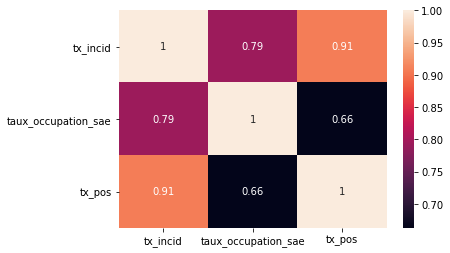

In [8]:
sns.heatmap(data=matrix, annot=True)

With this correlation matrix we can see that all variables are correlated. This is normal, because they all monitor the pandemic.

They also show that we don't need all of this to monitor the epidemic, but only the ones the less correlated; like : incidence rate and occupation rate.

Indeed if we take the positivity rate we can make good approximations based on the incidence rate. The incidence rate being more contrasted across time it will show more phases or informations than a flat line; Even if the incidence rate is a rate.



---



## Conclusion

Better Analysis we'll take broader data and make more precise analysis. As a quick analysis it as shows that we can make some statement in a few times based on data freely at disposal.

On the other hand we can also critic the sources that are already formated. That was the job of this quick examination.